# Bitcoin Price Prediction
baseline
- https://www.kaggle.com/someadityamandal/bitcoin-time-series-forecasting

In [31]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from chart_studio import tools
from chart_studio.plotly import plot, iplot
import chart_studio.plotly as py
import plotly.graph_objects as go
import gc

import matplotlib.pyplot as plt
import seaborn as sns
import re

In [32]:
df = pd.read_csv('./data/Bitcoin - History Data - Investing.com.csv')
df.head()

,날짜,종가,오픈,고가,저가,거래량,변동 %
0,2021년 02월 28일,"45,164.0","46,136.0","46,582.0","43,100.6",135.08K,-2.11%
1,2021년 02월 27일,"46,136.7","46,333.1","48,335.1","45,059.4",98.75K,-0.45%
2,2021년 02월 26일,"46,345.6","46,928.5","48,413.9","44,248.2",189.41K,-1.24%
3,2021년 02월 25일,"46,928.5","49,695.9","52,013.8","46,773.7",83.22K,-5.57%
4,2021년 02월 24일,"49,697.5","48,911.1","51,311.8","47,031.7",153.75K,1.61%


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2981 entries, 0 to 2980
Data columns (total 7 columns):
날짜      2981 non-null object
종가      2981 non-null object
오픈      2981 non-null object
고가      2981 non-null object
저가      2981 non-null object
거래량     2981 non-null object
변동 %    2981 non-null object
dtypes: object(7)
memory usage: 163.1+ KB


In [34]:
df.columns.tolist()

['날짜', '종가', '오픈', '고가', '저가', '거래량', '변동 %']

In [35]:
df = df.rename(columns={org:new
                   for (org, new)
                   in zip(df.columns.tolist(),
                        ['date', 'close', 'open', 'high', 'low', 'volume', 'fluctuation'])})
df.head()

,date,close,open,high,low,volume,fluctuation
0,2021년 02월 28일,"45,164.0","46,136.0","46,582.0","43,100.6",135.08K,-2.11%
1,2021년 02월 27일,"46,136.7","46,333.1","48,335.1","45,059.4",98.75K,-0.45%
2,2021년 02월 26일,"46,345.6","46,928.5","48,413.9","44,248.2",189.41K,-1.24%
3,2021년 02월 25일,"46,928.5","49,695.9","52,013.8","46,773.7",83.22K,-5.57%
4,2021년 02월 24일,"49,697.5","48,911.1","51,311.8","47,031.7",153.75K,1.61%


In [36]:
float('45,164.0'.replace(',', ''))

45164.0

In [37]:
df = df[['date', 'close', 'volume', 'fluctuation']]
df.loc[:, 'close'] = df['close'].apply(lambda x: x.replace(',','')).astype(np.float64)
df.loc[:, 'volume'] = df['volume'].apply(lambda x: float(x[:-1])*1000.0).astype(np.float64)
df.loc[:, 'fluctuation'] = df['fluctuation'].apply(lambda x: float(x[:-1])).astype(np.float32)

In [38]:
df.head()

,date,close,volume,fluctuation
0,2021년 02월 28일,45164.0,135080.0,-2.11
1,2021년 02월 27일,46136.7,98750.0,-0.45
2,2021년 02월 26일,46345.6,189410.0,-1.24
3,2021년 02월 25일,46928.5,83220.0,-5.57
4,2021년 02월 24일,49697.5,153750.0,1.61


In [39]:
df.loc[:, 'date'] = pd.to_datetime(df['date'].apply(lambda x: re.sub('[가-힣]', '-', x).replace(' ', '')[:-1]))

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2981 entries, 0 to 2980
Data columns (total 4 columns):
date           2981 non-null datetime64[ns]
close          2981 non-null float64
volume         2981 non-null float64
fluctuation    2981 non-null float32
dtypes: datetime64[ns](1), float32(1), float64(2)
memory usage: 81.6 KB


In [42]:
# 데이터 역순
df = df.sort_index(ascending=False).reset_index(drop=True)

In [43]:
df.head()

,date,close,volume,fluctuation
0,2013-01-01,13.3,28410.0,-1.55
1,2013-01-02,13.3,17970.0,0.00
2,2013-01-03,13.4,18030.0,0.90
3,2013-01-04,13.5,29640.0,0.75
4,2013-01-05,13.4,21330.0,-0.44


In [45]:
df['weighted_close'] = df['close'] * df['volume']

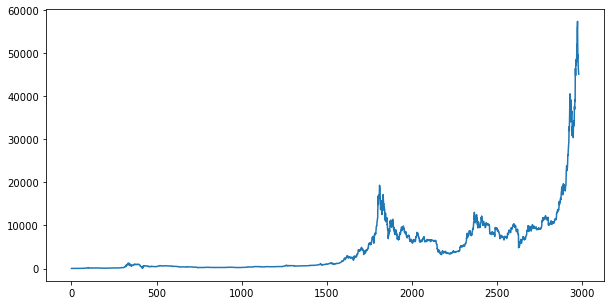

In [59]:
plt.figure(figsize=(10, 5))
plt.plot(df['close'])

### 자연로그를 취한 종가
- smoothing 효과 (변동성/기울기 완만해짐)
    - 미세한 차이를 크게, 커다란 차이를 작게
    - "차이"가 존재한다면 얼추 비슷한 크기로 나타내는 효과

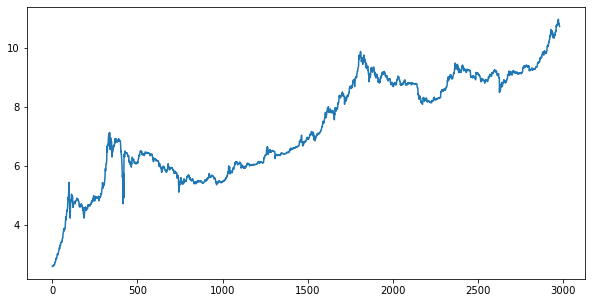

In [61]:
plt.figure(figsize=(10, 5))
plt.plot(np.log(df['close']))

### Weighted Close
- 가격과 매매량을 함께 고려함 > 일종의 물리력을 표현?
- Volume 그래프와 유사한 형태를 나타냄
    - 단위를 맞춰주면 어떻게 될까?

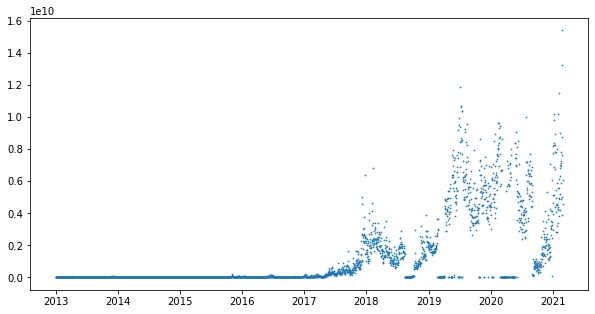

In [58]:
plt.figure(figsize=(10, 5))
plt.scatter(df['date'], df['weighted_close'], s=0.5)

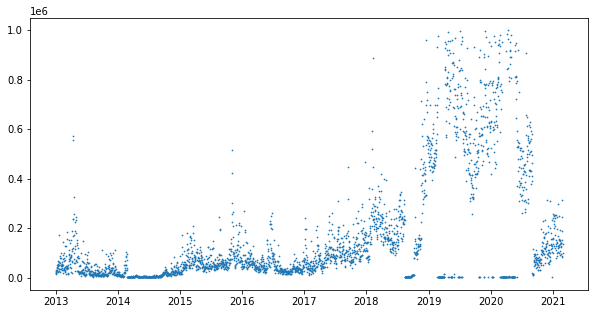

In [64]:
plt.figure(figsize=(10, 5))
plt.scatter(df['date'], df['volume'], s=0.5)

### Normalized Weighted Close
- Close(normalized) vs. Volume (normalized)
    - 2018년 하반기 이전 > 종가와 거래량이 함께 움직임
    - 2018년 하반기 이후 > 종가와 거래량 decoupling
        - 거래량이 크게 늘어났지만 가격은 횡보
        - 거래량 변동에 비하여 가격 변동폭은 상대적으로 적었음
        - 가격에 대하여 선행하고 있다?
- Close(normalized) vs. Weighted Close (normalized)
    - 2020년 1분기 이전 > 종가와 가중 종가가 함께 움직임
    - 2020년 1분기 이후 > 종가와 가중 종가 decoupling
        - 거래량 급락을 반영하여 2020년 말까지 하락한 뒤 21년 들어 상승세
- 2019년 이후 거래량이 (상대적으로) 바닥을 치는 경우도 심심찮게 발생
    - 가격, 거래량 간의 디커플링 등 이상 패턴을 고려해 보았을 때,
    - 누군가 힘을 열심히 쓰고 있다..?

In [65]:
close_normalized = (df['close'] - df['close'].min()) / (df['close'].max() - df['close'].min())
volume_normalized = (df['volume'] - df['volume'].min()) / (df['volume'].max() - df['volume'].min())
weighted_close_normalized = close_normalized * volume_normalized

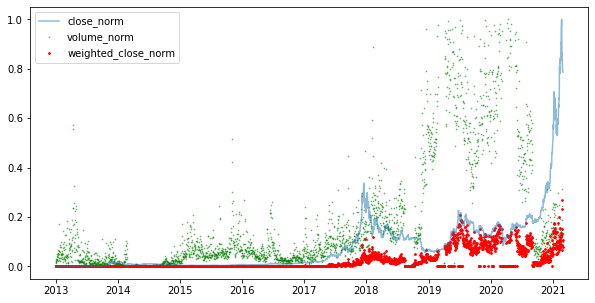

In [89]:
plt.figure(figsize=(10, 5))
plt.plot(df['date'], close_normalized, alpha=0.5)
plt.scatter(df['date'], volume_normalized, s=0.5, c='g', alpha=0.5)
plt.scatter(df['date'], weighted_close_normalized, c='r', s=3)
plt.legend(['close_norm', 'volume_norm', 'weighted_close_norm'])

### Fluctuation (1d)
- 0을 중심으로 진동
- 평균 0으로 회귀
- 일부 이상치를 제외하면 깔끔한 정규분포
- **일정한 간격으로 상승세와 하락세를 반복하는 계절성을 가진 것으로 보임**

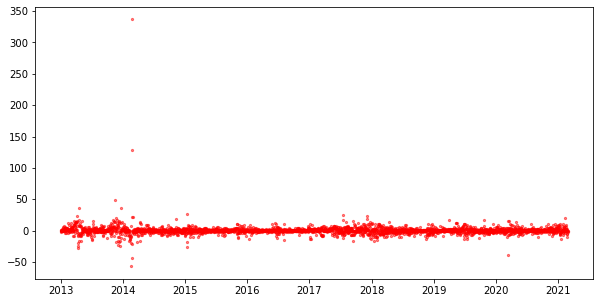

In [103]:
plt.figure(figsize=(10, 5))
plt.scatter(df['date'], df['fluctuation'], s=5, c='r', alpha=0.5)

(-50.0, 50.0)

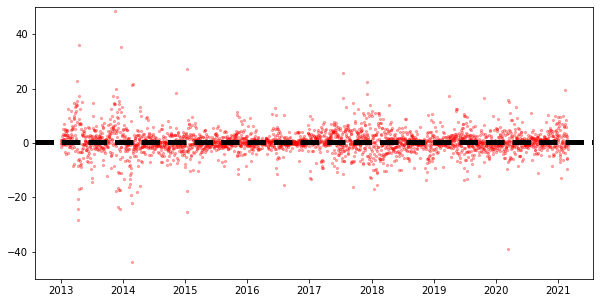

In [113]:
plt.figure(figsize=(10, 5))
plt.scatter(df['date'], df['fluctuation'], s=5, c='r', alpha=0.3)
plt.axhline(df['fluctuation'].mean(), color='k', linestyle='dashed', linewidth=5)
plt.ylim(-50, 50)

<AxesSubplot:xlabel='fluctuation', ylabel='Count'>

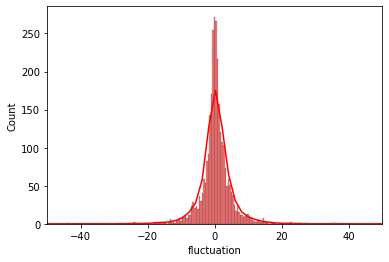

In [114]:
plt.xlim(-50, 50)
sns.histplot(df['fluctuation'], kde=True, color='red')

### Volume vs. Close
- 디커플링 현상을 마찬가지로 확인할 수 있음

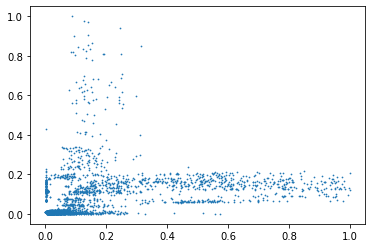

In [91]:
plt.scatter(volume_normalized, close_normalized, s=0.5)

### Volume vs. Weighted Close

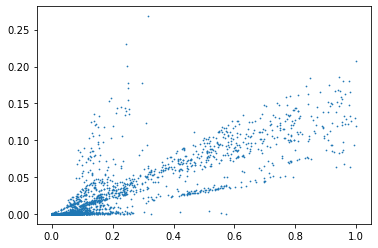

In [92]:
plt.scatter(volume_normalized, weighted_close_normalized, s=0.5)

In [93]:
df.head()

,date,close,volume,fluctuation,weighted_close
0,2013-01-01,13.3,28410.0,-1.55,377853.0
1,2013-01-02,13.3,17970.0,0.00,239001.0
2,2013-01-03,13.4,18030.0,0.90,241602.0
3,2013-01-04,13.5,29640.0,0.75,400140.0
4,2013-01-05,13.4,21330.0,-0.44,285822.0


In [94]:
df['close_log'] = np.log(df['close'])
df['close_norm'] = close_normalized
df['volume_norm'] = volume_normalized
df['weighted_close_norm'] = weighted_close_normalized

In [95]:
df.head()

,date,close,volume,fluctuation,weighted_close,close_log,close_norm,volume_norm,weighted_close_norm
0,2013-01-01,13.3,28410.0,-1.55,377853.0,2.587764,0.000000,0.028034,0.000000e+00
1,2013-01-02,13.3,17970.0,0.00,239001.0,2.587764,0.000000,0.017585,0.000000e+00
2,2013-01-03,13.4,18030.0,0.90,241602.0,2.595255,0.000002,0.017645,3.073006e-08
3,2013-01-04,13.5,29640.0,0.75,400140.0,2.602690,0.000003,0.029265,1.019338e-07
4,2013-01-05,13.4,21330.0,-0.44,285822.0,2.595255,0.000002,0.020948,3.648214e-08


In [112]:
df.to_csv('./data/bitcoin_eda.csv', encoding='utf-8-sig')